#### Overview about the data:

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Columns:**

- survival	 Survival	 0 = No, 1 = Yes
- pclass	 Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd
- sex	 Sex	
- Age	 Age in years	
- sibsp	 # of siblings / spouses aboard the Titanic	
- parch	 # of parents / children aboard the Titanic	
- ticket	 Ticket number	
- fare	 Passenger fare	
- cabin	 Cabin number	
- embarked	 Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable notes:**

- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

`Task: Task is to predict survival of the Passengers in the test data.`

**Logistic Regression**: Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

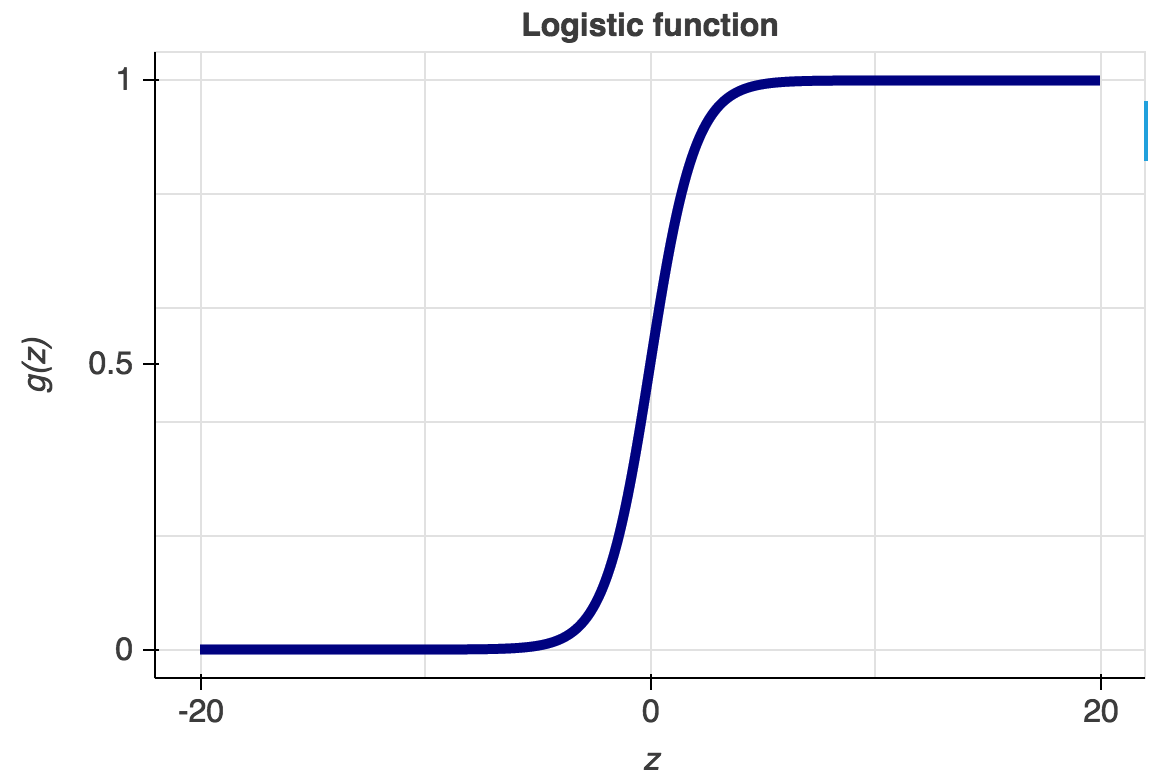

###### Importing and preview of data

In [229]:
#importing basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib inline: This is known as magic inline function.
#When using the 'inline' backend, our matplotlib graphs will be included in our notebook, next to the code. 

Let's dive into our dataset.

In [230]:
train_data = pd.read_csv("train.csv") #loading train data
test_data = pd.read_csv("test.csv") #loading test data

In [231]:
train_df = train_data.copy() #copy of train_data as train_df
train_df.head() #train_df preview

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
test_df = test_data.copy()#copy of train_data as train_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


As you can also notice that Suvived column is missing from the test data. As, this is out outcome variable. Otherwise I would have merged these two csv. Well, no issues we'll first perfrom all the operations with train_df and similar changes to test_df.

So, we'll train train our data with train_df and then predict the test data. 

##### Understanding our data

In [233]:
train_df.shape

(891, 12)

In [234]:
test_df.shape

(418, 11)

In [235]:
train_df.isnull().sum() #isnull is used for checking missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Analysis**: 
- train_df has three columns which is having missing values: age, cabin and embarked
- test_df has two columns which is having missing values: age and cabin and Fare

We can use many funtions like fillna (backward or forward) or replacing it by using central tendency. If we notice carefully, for train_df Age column has 177 missing values out of 891 entries which is ~19-20% of the overall data and test_df has 86 out of 418 which is ~20-21% of the data, which can be handled but the issue is with Cabin column. In cabin column of both test_df and train_df ~77-78% of the data is missing which is quite huge. So, we will ignore them and there is missing value in Embarked column only for train_df which is just 2 entries, ~0.2-0.3% of the data. So, can easily be treated. So we left with Fare of test_df only 1 entry has null value.

Let's first replace Fare null value with mean.

In [237]:
test_df.Fare.fillna(test_df["Fare"].mean(skipna=True), inplace=True)

I'm going with the central tendency capping. But before choosing between mean median or mode let's check for the distribution of Age column.

C:\Users\sacni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

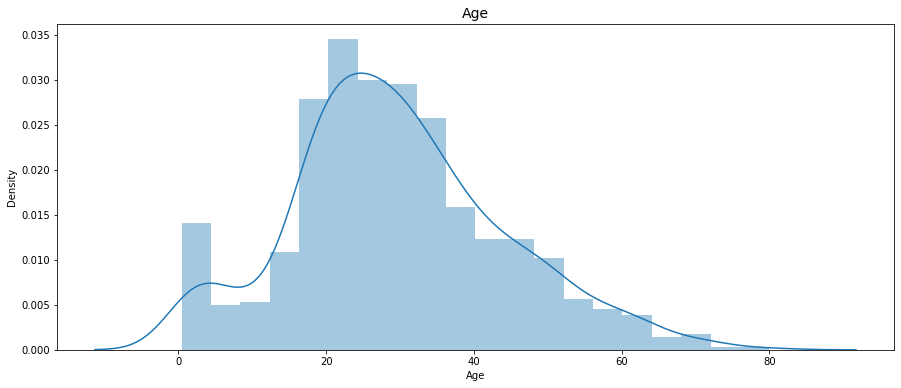

In [238]:
plt.figure(figsize=(15,6))
ax = sns.distplot(train_df.Age)
ax.set_title('Age', fontsize=14)

**Understanding**: Age raging between 25-35 has the maximun number of people travelled on the Titanic. Let's check mean and median of the entries without missing values.

In [239]:
train_df.Age.mean(skipna = True)

29.69911764705882

In [240]:
train_df.Age.median(skipna = True)

28.0

I'll go with median as it is by default in round figure so no need to work on it.

In [241]:
train_df.Age.fillna(train_df["Age"].median(skipna=True), inplace=True)

In [242]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

So, most of the people have Port of Embarkation is S which stands for Southampton. Let's quickly fill the na with S.

In [243]:
train_df.Embarked.fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

As Cabin has a lot of missing values we have ignored it and here we're done with missing values in train_df. Similar step in test_df for Age column.

In [244]:
test_df.Age.fillna(test_df["Age"].median(skipna=True), inplace=True)

Let's drop cabin column from both train_df and test_df

In [245]:
train_df.drop(["Cabin"], axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [246]:
test_df.drop(['Cabin'], axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Dealing with cateorical Terms.

In [247]:
train_df['PassengerId'].nunique()

891

In [248]:
train_df['Name'].nunique()

891

In [249]:
train_df['Ticket'].nunique()

681

In [250]:
train_df['Pclass'].nunique()

3

In [251]:
train_df['SibSp'].nunique()

7

In [252]:
train_df['Parch'].nunique()

7

In [253]:
train_df['Fare'].nunique()

248

**Analysis**: Now, PassengerId and name of every entries are unique, as well as ticket number except those who came with some person. So these features are not going to help us in further process. So, let's drop it.

In [254]:
train_df.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)

In [255]:
#Similarly with test_df
test_df.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)

Text(0.5, 1.0, 'Pclass Vs Fare')

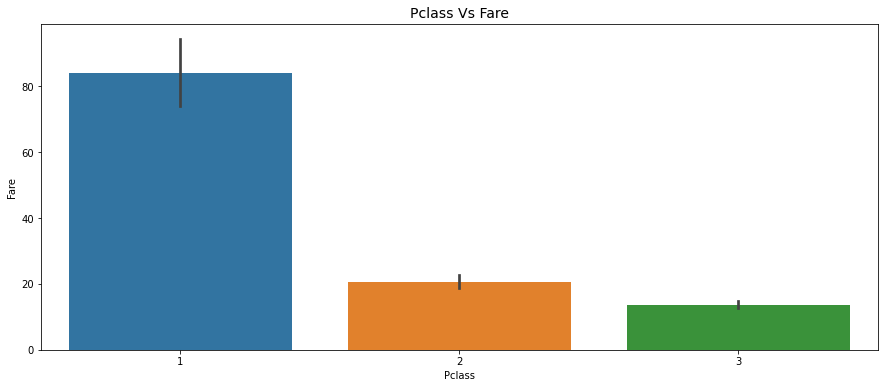

In [256]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=train_df['Pclass'], y=train_df['Fare'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Pclass Vs Fare', fontsize=14)

**Understanding**: So clearly, these are ordinal categories as 1st class passengers have paid more than 2nd trailing by 3rd class passengers.

Text(0.5, 1.0, 'Pclass Vs Survived')

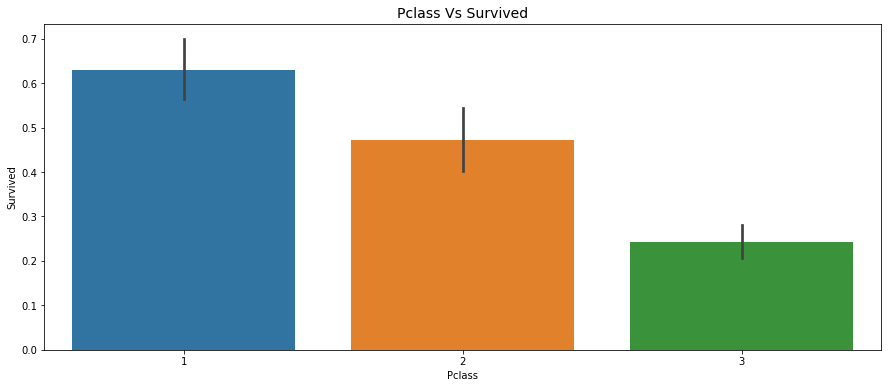

In [257]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=train_df['Pclass'], y=train_df['Survived'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Pclass Vs Survived', fontsize=14)

**Understanding**: Ah! so peoples who paid more had more secured life than those who paid less. So, it's clear that these are orinal categories so it's not needed to encode it using One Hot Encoding.

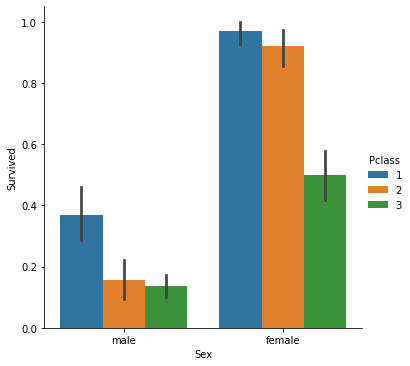

In [258]:
ax = sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train_df)

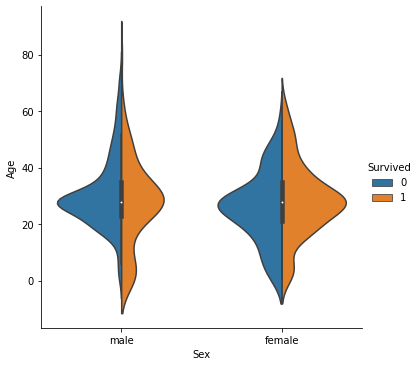

In [259]:
ax = sns.catplot(x="Sex", y="Age", hue="Survived", kind="violin", split=True, data=train_df)

**Understanding**: 
- 1. Females have survived more than Males.
- 2. Superior Passenger class people survived in higher number than there preceeding class.
- 3. Age has a little differnce but noticible point is childrens survived more than died.
- 4. Death in male is higher than survival among age ranges ~20-35.


In [260]:
print(train_df.Age.max())
print(train_df.Age.min())

age_gap = []

for i in range(0,81,5):
    age_gap.append(i)
    
train_df['Age'].groupby(pd.cut(train_df['Age'], age_gap)).count()

80.0
0.42


Age
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    285
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Age, dtype: int64

<Figure size 1296x720 with 0 Axes>

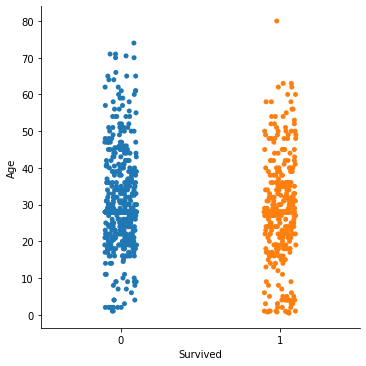

In [261]:
plt.figure(figsize=(18,10))
ax = sns.catplot(x='Survived', y='Age', data=train_df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

**Understanding**: 
- 1. 0-16 aged kids have survived more than the people belonging to group 17-48.
- 2. Again, 48-80 aged pople have survived more.

So they preffered to save kids, olds and women first. Good work!! 

But, I'll divide the age between two groups below 17 & above 48 in 1 and 17-48 in 0.

In [262]:
train_df['Age'] = np.where((train_df['Age'] > 17) & (train_df['Age'] < 49),0,1)

In [263]:
#similar changes with test data
test_df['Age'] = np.where((test_df['Age'] > 17) & (test_df['Age'] < 49),0,1)

Text(0.5, 1.0, 'Age Vs Survived')

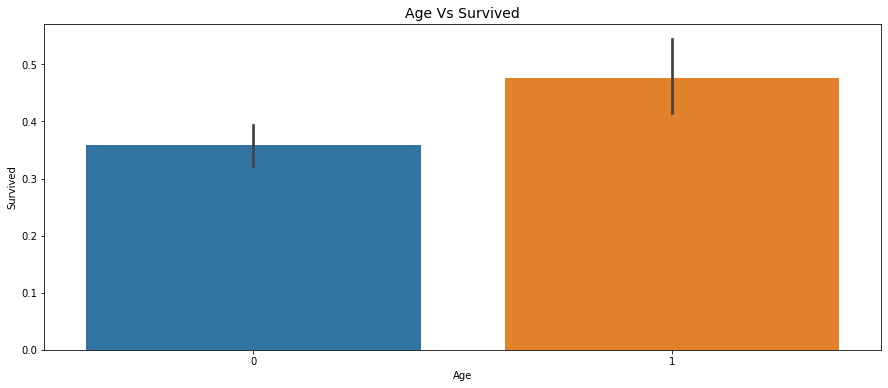

In [264]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=train_df['Age'], y=train_df['Survived'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Age Vs Survived', fontsize=14)

As you can see 0 has less chace for survival incomparison to 1

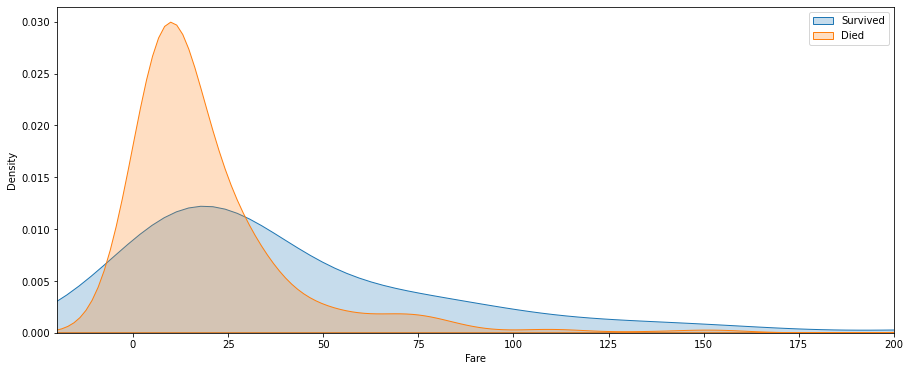

In [265]:
plt.figure(figsize=(15,6))
ax = sns.kdeplot(train_df["Fare"][train_df.Survived == 1],shade= True)
ax1 = sns.kdeplot(train_df["Fare"][train_df.Survived == 0], shade= True)
plt.legend(['Survived', 'Died'])
plt.xlim(-20,200);

**Understanding**:

As we discussed above the more you pay the more your life is secured. Here, is the same thing like the feature Pclass.

Text(0.5, 1.0, 'Embarked Vs Survived')

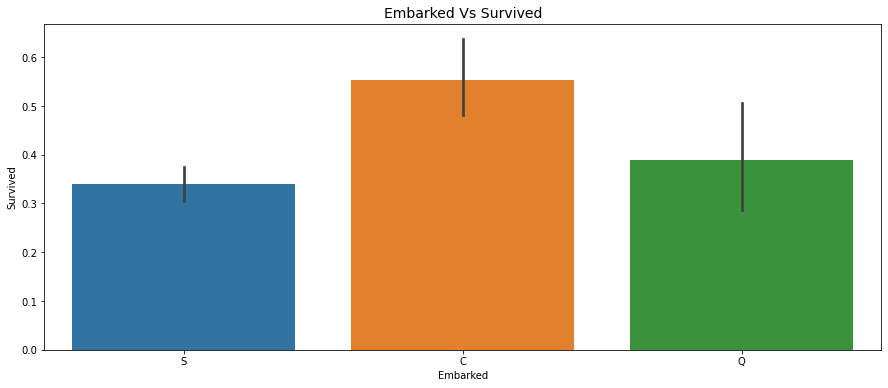

In [266]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=train_df['Embarked'], y=train_df['Survived'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Embarked Vs Survived', fontsize=14)

So. people from Cheobarg survived more than Queensland and Southampton. One of the reason I assume of S being low because majority of people embark at S or may be more males embark at S or may be Pclass plays any role.

Now, we are left with columns like Travelling with Sibiling or Parents.

In [267]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [268]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

**Analysis**:

Both column have a similarity that if 0 means they all are travelling alone and if any other value, they are either with parents or sibilings or say they aren't travelling alone. So, let's make it little simple.

Pepople travelling Alone would be 0, or travelling with someone would be 1. Let's make these changes.

In [269]:
# Combining result of SibSp and Parch and storing result in new column travel
train_df['Travel'] = train_df['SibSp'] + train_df['Parch']

In [270]:
#Changing values according to our analysis.
train_df['Travel'] = np.where((train_df.Travel == 0 ), 0, 1)

Text(0.5, 1.0, 'Travel Vs Survived')

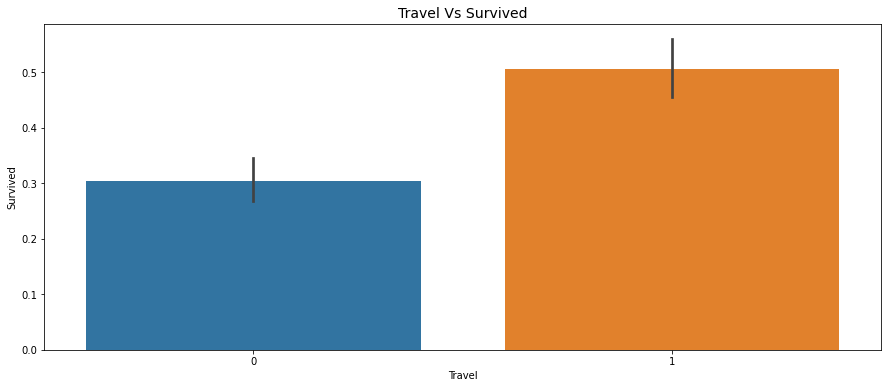

In [271]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=train_df['Travel'], y=train_df['Survived'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Travel Vs Survived', fontsize=14)

**Analysis**:

So, people who were travelling alone had less chance to surive in comparison with travelling with someone.

Now, will drop SibSp and Parch because they are left with no use.

In [272]:
train_df.drop(["SibSp",'Parch'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel
0,0,3,male,0,7.2500,S,1
1,1,1,female,0,71.2833,C,1
2,1,3,female,0,7.9250,S,0
3,1,1,female,0,53.1000,S,1
4,0,3,male,0,8.0500,S,0


In [273]:
#Similar chnages to test data

test_df['Travel'] = test_df['SibSp'] + test_df['Parch']
test_df['Travel'] = np.where((test_df.Travel == 0 ), 0, 1)
test_df.drop(["SibSp",'Parch'], axis=1, inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Travel
0,3,male,0,7.8292,Q,0
1,3,female,0,7.0000,S,1
2,2,male,1,9.6875,Q,0
3,3,male,0,8.6625,S,0
4,3,female,0,12.2875,S,1


Now its time to convert Embarked caterogical using One Hot Encoding or get_dummines, and label encode Sex column.

In [274]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel
0,0,3,1,0,7.2500,S,1
1,1,1,0,0,71.2833,C,1
2,1,3,0,0,7.9250,S,0
3,1,1,0,0,53.1000,S,1
4,0,3,1,0,8.0500,S,0


In [275]:
#Similarly with test data.
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Travel
0,3,1,0,7.8292,Q,0
1,3,0,0,7.0000,S,1
2,2,1,1,9.6875,Q,0
3,3,1,0,8.6625,S,0
4,3,0,0,12.2875,S,1


In [276]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix = ['Embarked'])
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Travel,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,1,0,0,1
1,1,1,0,0,71.2833,1,1,0,0
2,1,3,0,0,7.9250,0,0,0,1
3,1,1,0,0,53.1000,1,0,0,1
4,0,3,1,0,8.0500,0,0,0,1


In [277]:
train_df = pd.get_dummies(train_df, columns=['Pclass'], prefix = ['Pclass'])
train_df.head()

,Survived,Sex,Age,Fare,Travel,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,1,0,0,1,0,0,1
1,1,0,0,71.2833,1,1,0,0,1,0,0
2,1,0,0,7.9250,0,0,0,1,0,0,1
3,1,0,0,53.1000,1,0,0,1,1,0,0
4,0,1,0,8.0500,0,0,0,1,0,0,1


In [278]:
#Similarly with test data
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix = ['Embarked'])
test_df.head()

,Pclass,Sex,Age,Fare,Travel,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.8292,0,0,1,0
1,3,0,0,7.0000,1,0,0,1
2,2,1,1,9.6875,0,0,1,0
3,3,1,0,8.6625,0,0,0,1
4,3,0,0,12.2875,1,0,0,1


In [279]:
test_df = pd.get_dummies(test_df, columns=['Pclass'], prefix = ['Pclass'])
test_df.head()

,Sex,Age,Fare,Travel,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.8292,0,0,1,0,0,0,1
1,0,0,7.0000,1,0,0,1,0,0,1
2,1,1,9.6875,0,0,1,0,0,1,0
3,1,0,8.6625,0,0,0,1,0,0,1
4,0,0,12.2875,1,0,0,1,0,0,1


These are the final Columns of test and train data.

Checking for multicollinearity among the continuous columns using VIF methods.

**Multicollinearity**: Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

**Why not Multicollinearity?**: Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

**Detection of Multicollinearity**: Multicollinearity can be detected via various methods. One of the popular method is using VIF.

**VIF**: VIF stands for Variable Inflation Factors. VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

In [280]:
X1 = train_df.drop(['Embarked_C','Embarked_Q', 'Embarked_S'],axis=1)

In [281]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X1)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

C:\Users\sacni\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sacni\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const       0.000000
Survived    1.587365
Sex         1.521252
Age         1.073379
Fare        1.667940
Travel      1.236478
Pclass_1         inf
Pclass_2         inf
Pclass_3         inf
dtype: float64

**Analsis**:

None of the columns have high VIF. Hence, less multicolinearity. Great!!

Text(0.5, 1.0, 'CORRELATION MATRIX')

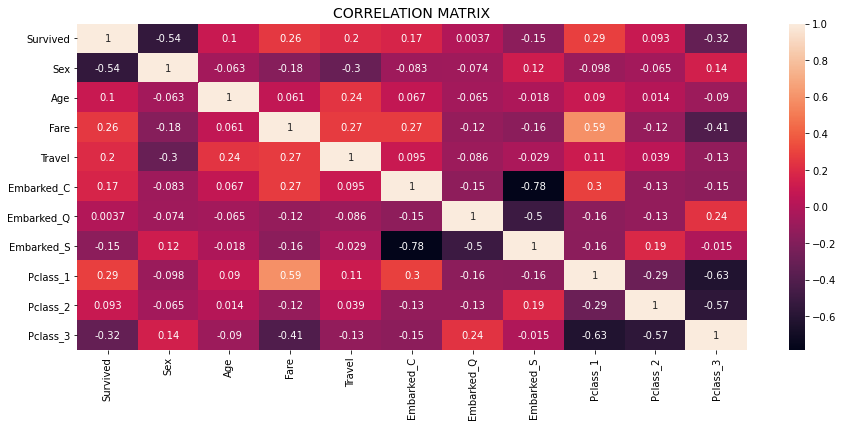

In [282]:
#Checking for correlation.

plt.figure(figsize=(15,6))
ax = sns.heatmap(train_df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

### Logistic Regression

In [283]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [285]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[137,  31],
       [ 27,  73]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

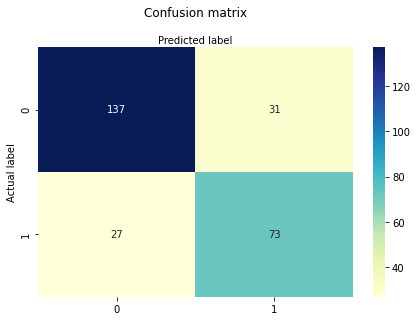

In [286]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [287]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7835820895522388
Precision: 0.7019230769230769
Recall: 0.73


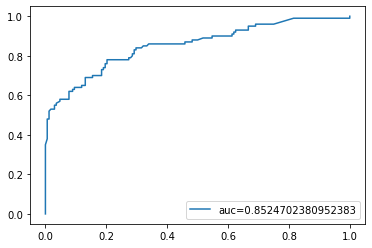

In [288]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision Trees (Entropy)

In [289]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

X = np.array(X)
y = np.array(y)

In [290]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [291]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [292]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[146,  22],
       [ 29,  71]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

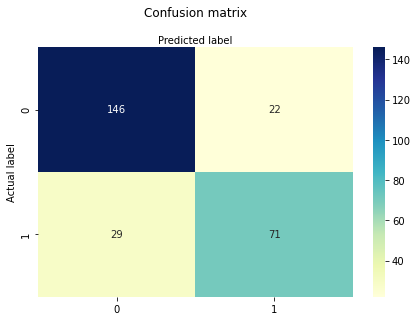

In [293]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [294]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8097014925373134
Precision: 0.7634408602150538
Recall: 0.71


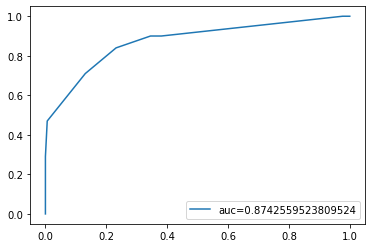

In [295]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Decision Tree (Gini Index)

In [296]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

In [297]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [298]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [299]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[146,  22],
       [ 29,  71]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

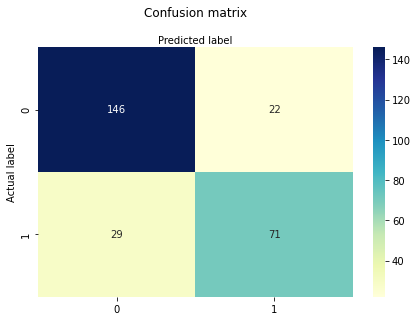

In [300]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [301]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8097014925373134
Precision: 0.7634408602150538
Recall: 0.71


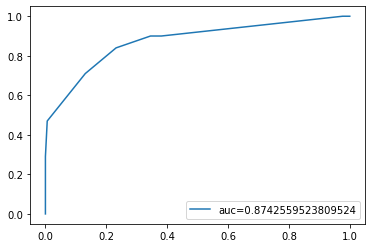

In [302]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest

In [303]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

In [304]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [305]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,criterion='entropy')
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [306]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[146,  22],
       [ 25,  75]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

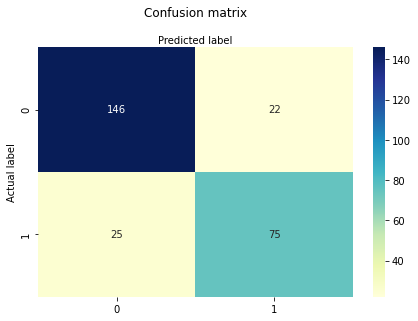

In [307]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [308]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8246268656716418
Precision: 0.7731958762886598
Recall: 0.75


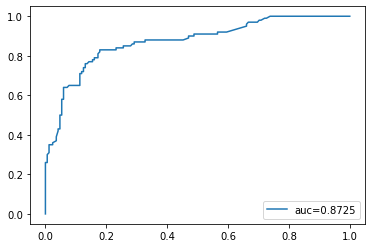

In [309]:
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machine

In [310]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

In [311]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [312]:
from sklearn import svm

SVM = svm.SVC(kernel='rbf', C=1, gamma = 0.1)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [313]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[133,  35],
       [ 28,  72]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

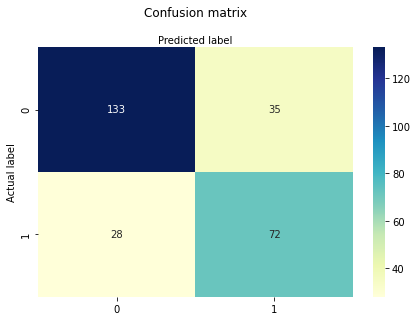

In [314]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [315]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7649253731343284
Precision: 0.6728971962616822
Recall: 0.72


### K-Fold

In [316]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler

In [317]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

In [318]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [319]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [320]:
#Support Vector Classifier
np.mean(cross_val_score(SVM, X, y, cv=10))

0.786729088639201

In [321]:
#Random Forest
np.mean(cross_val_score(RF, X, y, cv=10))

0.8149063670411986

In [322]:
#Decision Tree
np.mean(cross_val_score(dt, X, y, cv=10))

0.8080774032459427

In [323]:
#Logistic Regreesion
np.mean(cross_val_score(logreg, X, y, cv=10))

0.7744194756554307

### KNN

In [324]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

In [325]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [326]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [327]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [328]:
y_pred = classifier.predict(X_test)

In [329]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[143,  25],
       [ 30,  70]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

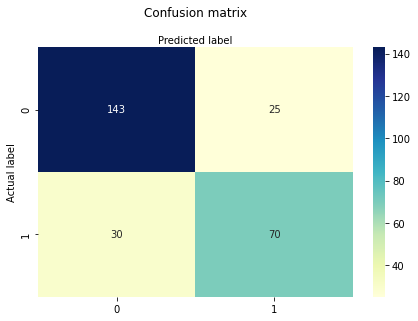

In [330]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [331]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7947761194029851
Precision: 0.7368421052631579
Recall: 0.7


In [332]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

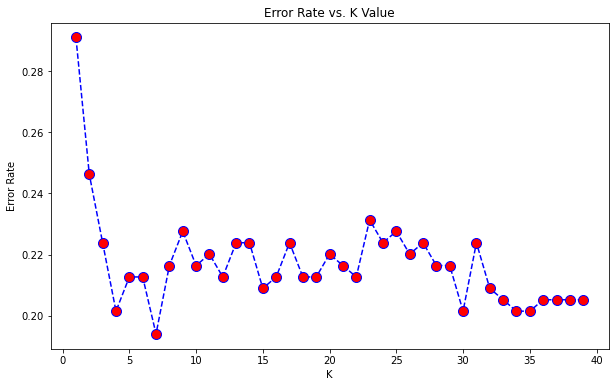

In [333]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [334]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [335]:
y_pred = classifier.predict(X_test)

In [336]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7873134328358209
Precision: 0.7945205479452054
Recall: 0.58


### GridSearchCV

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
X = train_df.drop(["Survived"], axis=1)
y = train_df['Survived']

params = {'kernel':('linear', 'rbf'), 'C':[1,5,10]}

In [111]:
grid = GridSearchCV(estimator=SVM, param_grid=params, scoring='accuracy', verbose=1, cv = 3, n_jobs=-1)
grid_result = grid.fit(X,y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.6min finished


Best: 0.786756 using {'C': 1, 'kernel': 'linear'}


In [116]:
from sklearn import svm

SVM = svm.SVC(kernel='linear', C=1, gamma = 0.1)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [117]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,  28],
       [ 29,  71]], dtype=int64)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7873134328358209
Precision: 0.7171717171717171
Recall: 0.71


In [337]:
test_df['Survived'] = SVM.predict(test_df)
test_df['PassengerId'] = test_data['PassengerId']

Predicted_outcome=  test_df[['PassengerId','Survived']]

Predicted_outcome.to_csv("Predicted_outcome.csv", index=False)

Predicted_outcome.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
